# Part 1: Instruction

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

### This project mainly includes the following contents:
1. Data pre-processing
2. Using the dataset to analyze the hotel operation/market situation
3. Building Machine learning models based on the dataset to predict whether customers will cancel the reservation

# Part 2: Read data

In [127]:
#import library file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#read data
data = 'https://raw.githubusercontent.com/xiaolancara/product_studio/master/hotel_bookings.csv'
hotel_data_orig = pd.read_csv(data)
hotel_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The data column mainly contains the following three aspects of information

1. Customer information: customer property information

2. Room information: price/type characteristics of hotel rooms

3. Order information: booking relevant time/status information

# Part 3: Data pre-processing
## 3.1: Missing value processing

In [128]:
#create a copy for first section to make sure not messing up data
hotel_data = hotel_data_orig.copy()
missing = hotel_data.isnull().sum(axis=0)
missing[missing!=0]

children         4
country        488
agent        16340
company     112593
dtype: int64

It can be seen that there are missing values in four columns, which are processed as follows:

1. Children and Country columns were filled with mode values due to small missing Numbers.
2. There are many missing agent columns, so the missing value is taken as a new category alone and marked as 0.
3. The company column is almost all missing values and does not provide enough information so delete this column.

In [129]:
#Missing value processing
hotel_data.children.fillna(hotel_data.children.mode()[0],inplace = True)
hotel_data.country.fillna(hotel_data.country.mode()[0],inplace=True)
hotel_data.agent.fillna(0, inplace=True)
hotel_data.drop(['company'],inplace = True,axis=1)
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 3.2 Expect data processing

1. Total days of stays_in_week_nights and stays_in_weekend_nights is 0. These data should be cleaned.
2. Total guests of adults, children and babies is 0. These data should be cleaned.
3. In the Data Explorer, Undefined/SC – no meal package. These data should be the same value.

In [130]:
#Expect data processing
#Total days of stays_in_week_nights and stays_in_weekend_nights is 0
TotalDays_clean = hotel_data[hotel_data[['stays_in_week_nights','stays_in_weekend_nights']].sum(axis=1) == 0 ]
hotel_data.drop(TotalDays_clean.index, inplace = True)

#Total guests of adults, children and babies is 0
TotalGuests_clean = hotel_data[hotel_data[['adults','children','babies']].sum(axis=1)== 0]
hotel_data.drop(TotalGuests_clean.index, inplace = True)

#Undefined/SC – no meal package. These data should be the same value.
hotel_data.meal.replace('Undefined','SC',inplace = True)
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_week_nights            118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  float64
 11  babies                          118565 non-null  int64  
 12  meal            

Data pre-processing completed

# Part 4:  Exploratory Data Analysis (EDA)
## 4.1 Customer information
### 4.1.1 Guest number

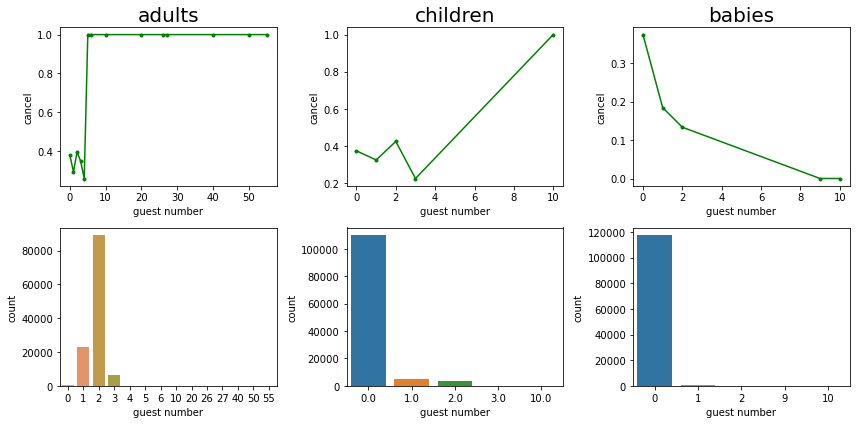

In [131]:
# relationship between reservations and cancellations
plt.figure(figsize = (12,6))
index = 0
for guests in ['adults','children','babies']:
    index +=1
    plt.subplot(2,3,index)
    plt.plot(hotel_data.groupby(guests)['is_canceled'].mean(),'go-',ms=3)
    plt.title(guests, fontsize=20)
    plt.xlabel('guest number')
    plt.ylabel('cancel')    
    
    plt.subplot(2,3,index+3)       
    guests_states = hotel_data[guests].value_counts()    
    sns.barplot(guests_states.index,guests_states.values)   
    plt.xlabel('guest number')
    plt.ylabel('count') 

plt.tight_layout()
plt.show()

As we can see:
1. Single and double guest numbers are the main reservation orders. The major guests are adults.
2. The cancellation rate for order includes babies has dropped
3. More than 5 guests orders are almost cancelled. Hotels need to pay attention to this sort of orders.

According to different hotels, the cancellation rates of the following conditions are analyzed as below:
1. single guest: adults = 1, children, babies = 0
2. double guests: adults = 2, children, babies = 0
3. family guests: adults > 2, children, babies > 0

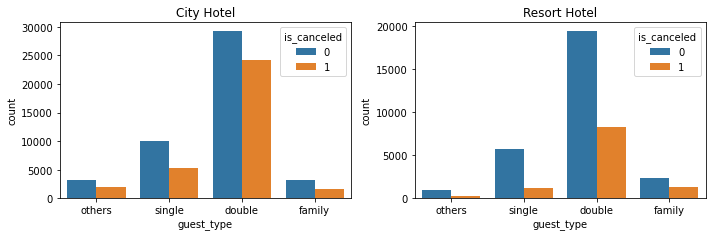

In [132]:
#single guest
singleGuest = (hotel_data.adults == 1) & (hotel_data.children == 0) & (hotel_data.babies == 0)
#double guests
doubleGuests = (hotel_data.adults == 2) & (hotel_data.children == 0) & (hotel_data.babies == 0)
#family guests
familyGuests = (hotel_data.adults >= 2) & (hotel_data.children > 0) | (hotel_data.babies > 0)

#insert 1 more column 'guest_type'
#singleGuest: value = 1
#doubleGuest: value = 2
#familyGuest: value = 3
hotel_data['guest_type'] = singleGuest.astype(int) + doubleGuests.astype(int) * 2 + familyGuests.astype(int) * 3
plt.figure(figsize=(10,6))
index=1
for hotel_value in ['City Hotel','Resort Hotel']:
    plt.subplot(2,2,index)
    index +=1
    ax = sns.countplot(x='guest_type',hue='is_canceled',data = hotel_data[hotel_data.hotel == hotel_value])
    plt.xticks([0, 1, 2, 3], ['others', 'single', 'double', 'family'])
    plt.title(hotel_value)
    
plt.tight_layout()
plt.show()
#hotel_data.info()

- For City Hotels, cancel rate is double > single ≈ family. The hotel should pay attention to the double guests that supports more services for double guests to reduce the cancel rate.

- For Resort Hotel, cancel rate is family> double> single. The hotel should pay attention to the family guests that supports more services for family guests to reduce the cancel rate.

## 4.2 Attributes relevance to cancellation
First of all, we have to select attributes. The selection of feature variables should meet the following requirements:
1. Features must be available to the customer at the time of booking
2. Exclude invalid attributes such as country, arrival_date_year, etc

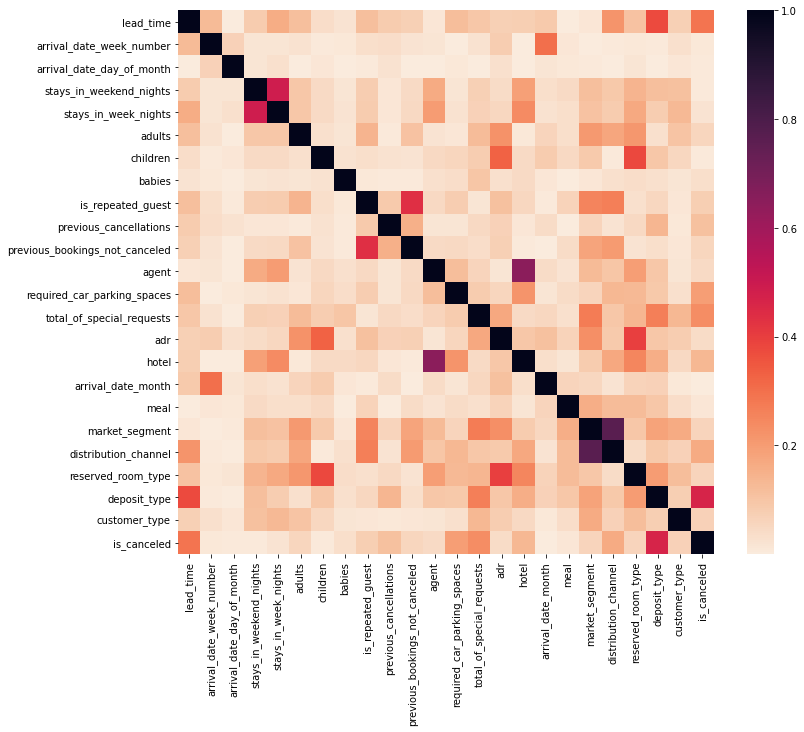

In [133]:
#select attributes
num = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
    'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'agent', 'required_car_parking_spaces',
    'total_of_special_requests', 'adr']

cat = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'deposit_type',
    'customer_type']

target = ['is_canceled']
ref = num+cat+target
train = hotel_data[ref]
#
train[cat]=train[cat].apply(LabelEncoder().fit_transform)
#the relationship between the attributes and is_canceled
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr().abs(), cmap=sns.cm.rocket_r)

# Conclusion
The attributes of high relationship with cancellation of reservation include: lead_time, deposit_type, total_of_special_request, required_car_parking_spaces, hotel, etc.

# Reference
https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://seaborn.pydata.org/generated/seaborn.countplot.html